### Import the required libraries

In [30]:
import pandas as pd
from darts import TimeSeries

### Import and read the dataset

In [31]:
data = pd.read_csv("Electric_Production.csv")

data.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


### Check the number of rows and columns in the dataset

In [32]:
data.shape

(397, 2)

### Split the dataset into training set and testing set. Here, I am choosing the 250th time period ('9/1/2005') to make the split because there are 398 rows.

In [33]:
get_data = TimeSeries.from_dataframe(data, 'DATE', 'IPG2211A2N')

train_data, test_data = get_data.split_before(pd.Timestamp('9/1/2005'))

In [34]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()

model.fit(train_data)

In [35]:
prediction = model.predict(len(test_data))

print("Predicted", prediction[:5])

print("Actual", test_data[:5])

Predicted <TimeSeries (DataArray) (DATE: 5, component: 1, sample: 1)>
array([[[ 99.29951794]],

       [[ 92.89865838]],

       [[ 95.53511645]],

       [[109.42318734]],

       [[116.96666904]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 2005-09-01 2005-10-01 ... 2006-01-01
  * component  (component) object 'IPG2211A2N'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
Actual <TimeSeries (DataArray) (DATE: 5, component: 1, sample: 1)>
array([[[ 99.1155]],

       [[ 89.7567]],

       [[ 90.4587]],

       [[108.2257]],

       [[104.4724]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 2005-09-01 2005-10-01 ... 2006-01-01
  * component  (component) object 'IPG2211A2N'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


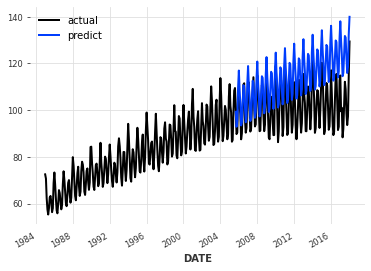

In [38]:
import matplotlib.pyplot as plt

get_data.plot(label='actual')

prediction.plot(label='predict', lw=2)

plt.legend()

### The electric production values after year 2006 are forecasted.